# ProRail Storing Analyse & Voorspellingen
Voor het project Data-driven Business hebben wij de opdracht gekregen om ProRail te helpen bij het voorspellen van de hersteltijd van een storing. We hebben van ProRail een dataset gekregen waar alles in staat over storingen in het verleden. Nu is het aan ons om de data op de juiste manier te analyseren en er voorspellende modellen bij te maken.

## Analyse
Het is erg belangrijk om de data grondig te analysereren. We hebben op dit moment nog geen idee waar we mee werken, dus gaan we dat uitzoeken.

### Inladen & Configureren
Voor dat we aan de analyse gaan beginnen moeten de benodigdheden worden geïmporteerd en geconfigureerd worden. Pandas en Numpy zijn ervoor om de data te analyseren. SciKit-Learn is er voor om de modellen te maken, en Joblib gebruiken we aan het einde om de modellen op te slaan. Daarnaast zijn er nog een aantal configuraties die gedaan moeten worden om het proces soepeler te laten verlopen.

#### Imports

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import joblib

#### Configuratie

In [65]:
pd.set_option('display.max_columns', None)

in de data zijn values in een column met verschillende Type, met low_memory=False kunt pandas bij inlezen een faste Type voor een column vast leggen.

In [66]:
df = pd.read_csv('Data/sap_storing_data_hu_project.csv', index_col=0, low_memory=False)
df.head()

,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_mon_begin_ddt,stm_sap_meldtekst,stm_mon_toelichting_trdl,stm_oh_pg_mld,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_equipm_omschr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_scenario_mon,stm_status_melding_sap,stm_mon_nr_status_omschr,stm_mon_nr__statuscode,stm_mon_nr_status_wijzdd,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_oh_pg_gst,stm_geo_gst,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_equipm_omschr_gst,stm_objectdl_code_gst,stm_objectdl_groep_gst,stm_km_van_gst,stm_km_tot_gst,stm_progfh_in_ddt,stm_progfh_in_invoer_ddt,stm_progfh_gw_ddt,stm_progfh_gw_lwd_ddt,stm_progfh_hz,stm_oorz_groep,stm_oorz_code,stm_oorz_tkst,stm_veroorz_groep,stm_veroorz_code,stm_veroorz_tekst_kort,stm_effect,stm_afspr_aanvangddt,stm_fh_ddt,stm_fh_status,stm_sap_storeind_ddt,stm_mon_eind_ddt,stm_mon_vhdsincident,stm_tao_indicator,stm_tao_indicator_vorige,stm_tao_soort_mutatie,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_evb,stm_dir_betrok_tr,stm_aangelegd_dd,stm_aangelegd_tijd,stm_sap_melddatum,stm_sap_meldtijd,stm_mon_begindatum,stm_mon_begintijd,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_functiepl_gst,stm_techn_gst,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_arbeid,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur,stm_progfh_gw_datum,stm_progfh_gw_tijd,stm_progfh_gw_lwd_datum,stm_progfh_gw_lwd_tijd,stm_progfh_gw_duur,stm_progfh_gw_teller,stm_afspr_aanvangdd,stm_afspr_aanvangtijd,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_mon_eind_datum,stm_mon_eind_tijd,stm_controle_dd,stm_akkoord_mon_toewijz,stm_status_sapnaarmon,stm_fact_jn,stm_akkoord_melding_jn,stm_afsluit_ddt,stm_afsluit_dd,stm_afsluit_tijd,stm_rec_toegev_ddt,stm_hinderwaarde,stm_actie,stm_standplaats,stm_status_gebr,stm_wbi_nummer,stm_projnr,stm_oorz_tekst_kort,stm_historie_toelichting,stm_schade_verhaalb_jn,stm_schadenr,stm_schade_status_ga,stm_schade_statusdatum,stm_relatiervo_vorig,stm_relatiervo_volgend,stm_relatiervo,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar,stm_afspr_func_hersteldd,stm_afspr_func_hersteltijd,stm_sorteerveld,stm_rapportage_maand,stm_rapportage_jaar,stm_x_bron_publ_dt,stm_x_bron_bestandsnaam,stm_x_bron_arch_dt,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2014,07/05/2014 05:30:12,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,34415,3617016,07/05/2014 05:44:24,0
1,50053211,0.0,NaN,02/01/2006 09:00:00,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,NaN,Logboeknr Geeltje : 49 Tijd: 0900,NaN,NaN,624.0,624.0,NaN,NaN,NaN,0.0,0.0,9.0,NaN,MAFS MAFD,NaN,NaN,00/00/0000,02/01/2006 09:00:00,NaN,81S,624.0,624.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Z,ONR-RIB,133.0,Papieren ontbreken,ONREGRIB,B,Volker,NaN,NaN,02/01/2006 09:00:00,4.0,02/01/2006 09:00:00,NaN,NaN,N,NaN,NaN,0,B,"0,00",NaN,03/01/2006,04:48:18,02/01/2006,09:00:00,NaN,NaN,NaN,624,NaN,81.0,624,S,02/01/2006,09:00:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,NaN,99999999.0,0.0,00/00/0000,00:00:00,02/01/2006,09:00:00,0.0,99999999.0,02/01/2006,09:00:00,NaN,NaN,05/01/2006,J,NaN,N,J,05/01/2009 15:10:09,05/01/2009,15:10:09,02/01/2006 04:48:18,0.0,NaN,N

Er zijn een aantal kolommen waar helemaal geen waardes in staan. Die gaan we er dus uit filteren, aangeien we er niks aan hebben.

In [67]:
df = df[[
    "stm_mon_nr", "stm_vl_post", "stm_sap_meld_ddt", "stm_sap_meldtekst_lang",
    "stm_sap_meldtekst", "stm_geo_mld", "stm_equipm_nr_mld", "stm_equipm_soort_mld",
    "stm_equipm_omschr_mld", "stm_km_van_mld", "stm_km_tot_mld", "stm_prioriteit",
    "stm_aanngeb_ddt", "stm_oh_pg_gst", "stm_geo_gst", "stm_equipm_nr_gst",
    "stm_equipm_soort_gst", "stm_equipm_omschr_gst", "stm_km_van_gst", "stm_km_tot_gst",
    "stm_oorz_groep", "stm_oorz_code", "stm_oorz_tkst", "stm_fh_ddt",
    "stm_fh_status", "stm_sap_storeind_ddt", "stm_tao_indicator", "stm_tao_indicator_vorige",
    "stm_tao_soort_mutatie", "stm_tao_telling_mutatie", "stm_tao_beinvloedbaar_indicator", "stm_sap_melddatum",
    "stm_sap_meldtijd", "stm_contractgeb_mld", "stm_techn_mld", "stm_contractgeb_gst",
    "stm_techn_gst", "stm_aanngeb_dd", "stm_aanngeb_tijd", "stm_aanntpl_dd",
    "stm_aanntpl_tijd", "stm_progfh_in_datum", "stm_progfh_in_tijd", "stm_progfh_in_invoer_dat",
    "stm_progfh_in_invoer_tijd", "stm_progfh_in_duur", "stm_progfh_gw_tijd", "stm_progfh_gw_teller",
    "stm_fh_dd", "stm_fh_tijd", "stm_fh_duur", "stm_sap_storeinddatum",
    "stm_sap_storeindtijd", "stm_oorz_tekst_kort", "stm_pplg_van", "stm_pplg_naar",
    "stm_dstrglp_van", "stm_dstrglp_naar"
]]

#### Opvallend

De data bestaat voornamelijk uit drie soorten gegevens:
- Tekstuele inhoud
- Numerieke klassen
- Datum en tijd

Tijdens het proces wanneer het model wordt gebruikt, zijn niet alle data beschikbaar. Kolommen die eindigen met _gst zijn niet geschikt.

## Visualisatie

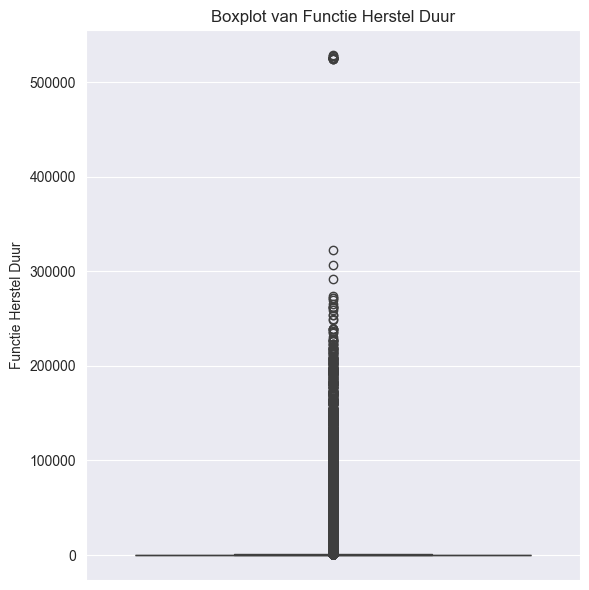

In [68]:
plt.figure(figsize=(6, 6))
sns.boxplot(y='stm_fh_duur', data=df)
plt.ylabel('Functie Herstel Duur')
plt.title('Boxplot van Functie Herstel Duur')
plt.tight_layout()
plt.show()

In [69]:
q1 = df['stm_fh_duur'].quantile(0.25)
mediaan = df['stm_fh_duur'].median()
q3 = df['stm_fh_duur'].quantile(0.75)

print(f"Q1 (25e percentiel): {q1}")
print(f"Mediaan (50e percentiel): {mediaan}")
print(f"Q3 (75e percentiel): {q3}")

Q1 (25e percentiel): 11.0
Mediaan (50e percentiel): 84.0
Q3 (75e percentiel): 256.0


Het Functie herstel tijd zijn enorm veel uitschiters.<br>
hier kunt we uitzien dat 25% gevallen minder dan 11 minuten is tot functie herstel.<br>
En de mediaan ligt op 84 minuten en 75% van de data ligt onder 252 minuten.<br>
Verder zijn enorm veel en groot uischiter die zelf dagen of manden lang zijn.

In [70]:
def Visulaisatie_plot(df,x_feature,beschrijving):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_feature, y='stm_fh_duur', data=df, estimator='mean')
    plt.xlabel(beschrijving)
    plt.ylabel('Gemiddelde Functie Herstel Duur')
    plt.title(f'Gemiddelde Hersteltijd per {beschrijving}')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

### geo_mld

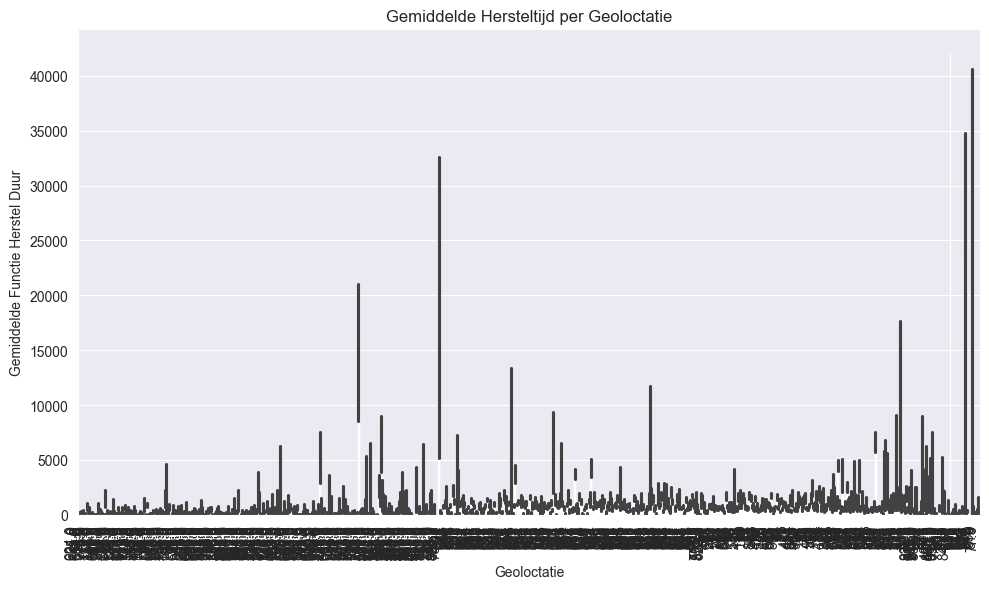

In [71]:
x_feature = 'stm_geo_mld'
beschrijving = 'Geoloctatie'
Visulaisatie_plot(df, x_feature, beschrijving)

Er zijn te veel klassen van geolocatie wat niet leesbaar is, ook zijn velen klassen met extrame uitschiters.

### contractgeb_mld

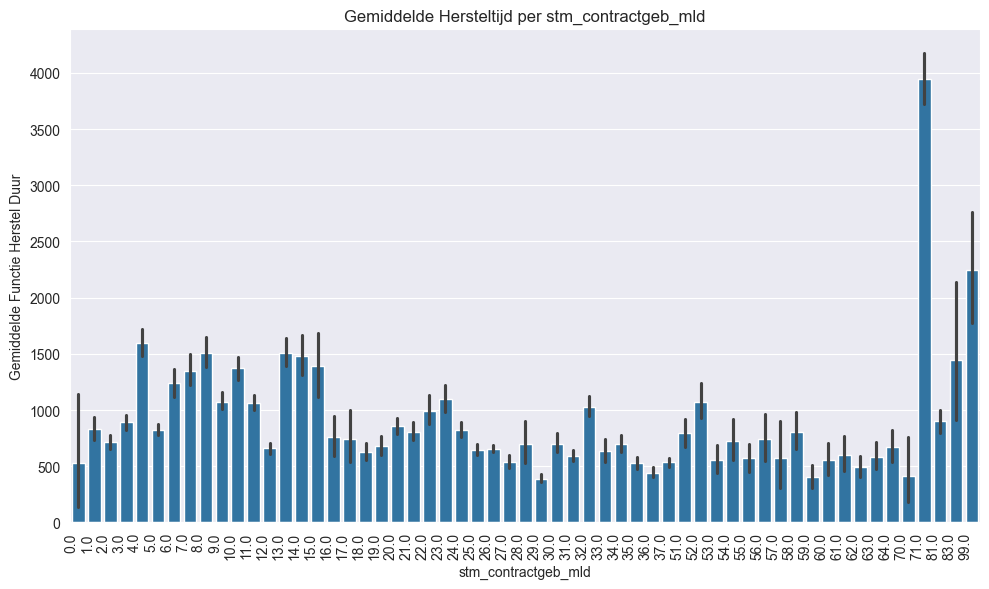

In [72]:
x_feature = 'stm_contractgeb_mld'
beschrijving = 'stm_contractgeb_mld'
Visulaisatie_plot(df, x_feature, beschrijving)

Voor contractgebied zijn de klassen goed te zien, elke klassen hebben groter uitschiters, elke klassen verschilt van elkaar en heeft iedee zijn eigen eigenschap

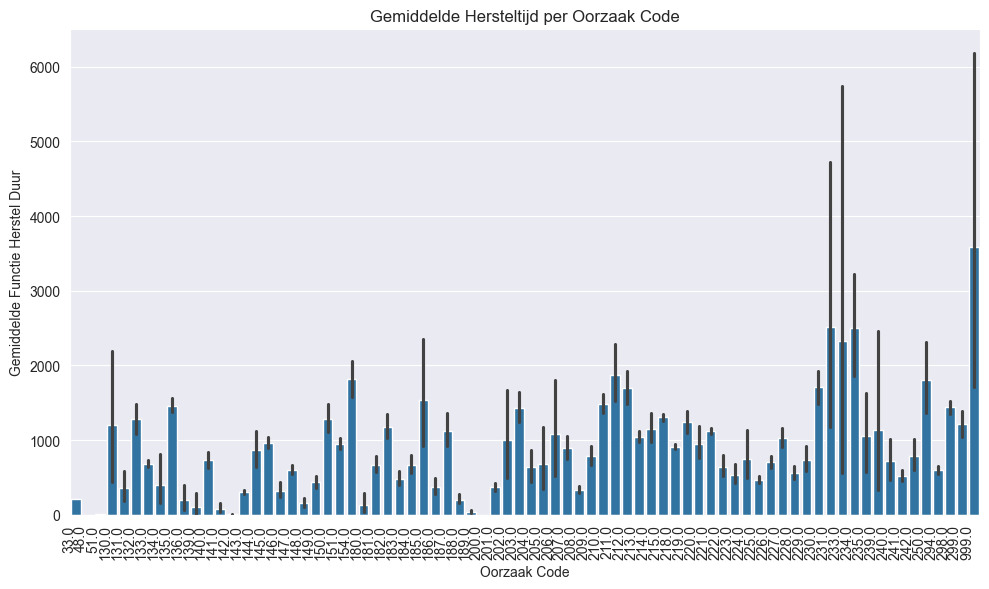

In [73]:
x_feature = 'stm_oorz_code'
beschrijving = 'Oorzaak Code'
Visulaisatie_plot(df, x_feature, beschrijving)

Voor oorzaak code zijn de klassen goed te zien, dat verschillen de oorazaak code kunt leiden tot lang of korte hersteltijden.

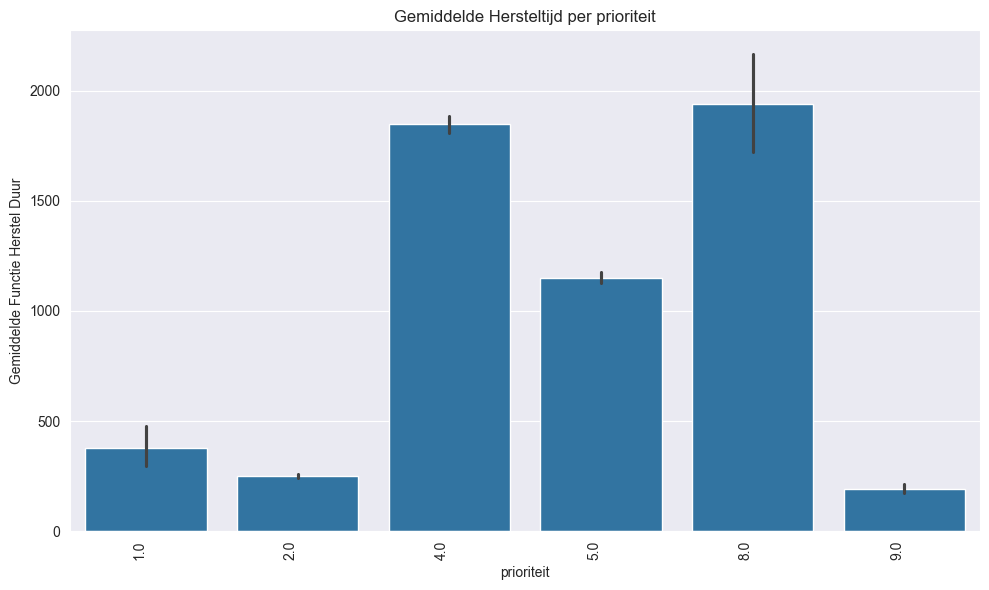

In [74]:
x_feature = 'stm_prioriteit'
beschrijving = 'prioriteit'
Visulaisatie_plot(df, x_feature, beschrijving)

Voor priorteit zijn de klassen kunt ook hier goed of een prioriteit tot lang of korte hersteltijden leiden.

#### Bruikbare Features

Omdat de dataset enorm en vrij ingewikkeld is. Hebben we samen met de opdrachtgever gezeten om te bepalen welke kolommen relevant zijn, zodat we de rest er uit kunnen filteren.

In [75]:
data = df[[
    'stm_oorz_code', 'stm_sap_melddatum', 'stm_sap_meldtijd', 
    'stm_aanntpl_tijd', 'stm_fh_tijd', 'stm_techn_mld', 'stm_prioriteit',
    'stm_contractgeb_mld', 'stm_fh_duur', 'stm_progfh_in_duur', 'stm_progfh_in_tijd'
]]

Hier zijn de betekenissen en meetwaardes van de kolommen die we gaan gebruiken:
| Kolom | Betekenis | Meetwaarde |
|-|-|-|
| stm_oorz_code | Oorzaak code | Nominaal |
| stm_sap_melddatum | Datum melding | Ordinaal |
| stm_sap_meldtijd | Tijdstip melding | Ordinaal |
| stm_aanntpl_tijd | Tijdstip aannemer ter plaatse | Ordinaal |
| stm_fh_tijd | Tijdstip functieherstel | Ordinaal |
| stm_techn_mld | Techniekveld melding | Nominaal |
| stm_prioriteit | Prioriteitsindicatie | Ordinaal |
| stm_contractgeb_mld | Contract gebied melding | Nominaal |
| stm_fh_duur | Duur functieherstel | Continue |
| stm_progfh_in_duur | Prognose duur functieherstel | Continue |
| stm_progfh_in_tijd | Prognose tijd functieherstel | Ordinaal |

#### Converteren Tijden

We gaan hier de tijden converteren van HH:MM:SS formaat naar minuten sinds middernacht, zodat we er berekeningen mee kunnen uitvoeren.

In [76]:
# Kolomnamen met tijd in HH:MM:SS formaat
tijd_kolommen = ['stm_sap_meldtijd', 'stm_aanntpl_tijd', 'stm_fh_tijd','stm_progfh_in_tijd']

# Functie om tijdstring om te zetten naar totaal aantal minuten
def convert_time_to_minutes(df, columns):
    for col in columns:
        df.loc[:, col] = pd.to_datetime(df[col], format='%H:%M:%S', errors='coerce')
        df.loc[:, col] = df[col].apply(lambda x: x.hour * 60 + x.minute if pd.notnull(x) else None)
    return df

#### Functie Hersteltijd

We willen de functie hersteltijd gaan voorspellen, dus zullen we moeten kijken hoe deze kolom zich verhoudt to de andere kolommen in de data.

In [77]:
data = convert_time_to_minutes(data, tijd_kolommen)

In [78]:
data[['stm_sap_meldtijd', 'stm_aanntpl_tijd', 'stm_fh_tijd','stm_fh_duur']]

,stm_sap_meldtijd,stm_aanntpl_tijd,stm_fh_tijd,stm_fh_duur
0,NaN,NaN,NaN,NaN
1,540.0,0.0,540.0,0.0
2,755.0,0.0,806.0,51.0
3,1000.0,0.0,1040.0,40.0
4,1350.0,0.0,1356.0,6.0
...,...,...,...,...
908625,486.0,545.0,569.0,83.0
908626,561.0,608.0,644.0,83.0
908627,561.0,608.0,644.0,83.0
908628,855.0,885.0,914.0,19.0


Hieruit blijkt dat functie hersteel duur gelijk aan hersteel tijdstip - meldings tijdstip<br>
ook zien je bij somig storing dat geen infomatie is wanneer aannemer aanweizig was.

In [79]:
len(data[data['stm_fh_duur'] == 0])

171713

In [80]:
len(data.loc[(data["stm_progfh_in_tijd"] == data["stm_fh_tijd"]) & (df["stm_fh_tijd"] != 0)])

313808

In [81]:
len(data[data['stm_fh_duur'] == (data['stm_progfh_in_tijd']-data['stm_aanntpl_tijd'])])

167644

Hieruit kunnen we zien dat 160.000 data geen stroning bij melding.<br>
140.000 data prognose functie herstel tijdstip gelijk zijn aan werkelijk hersteltijd<br>
150.00 data zijn werkelijk FHT gelijk aan tijdstip aannemer te plaats tot prognose functie herstel tijdstip 

in stm_progfh_in_duur zijn str values, we bewaar eerste alle numeric waardes en zet we de type als int

In [82]:
data.loc[:, 'stm_progfh_in_duur'] = pd.to_numeric(data['stm_progfh_in_duur'], errors='coerce')
data.loc[:, 'stm_progfh_in_duur'] = data['stm_progfh_in_duur'].fillna(0).astype(int)

/tmp/ipykernel_10620/3402014665.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.loc[:, 'stm_progfh_in_duur'] = data['stm_progfh_in_duur'].fillna(0).astype(int)


In [83]:
len(data[data['stm_progfh_in_duur'] == (data['stm_progfh_in_tijd']-data['stm_aanntpl_tijd'])])

521719

In [84]:
len(data[data['stm_progfh_in_duur'] == data['stm_fh_duur']])

104189

verder is te zien dat, 120.000 data dat prognose functie herstel tijd gelijk tijdstip aannemer te plaats + prognose functie herstel tijdstip <br>
ook zijn 9.000 data dat prognose duur gelijk aan werkelijk FHT duur

# Target

voor de traget neem we de tijd neem de functie hersteltijd van waarneer de aanmener aanweizig is tot dat weer gereiden mogen worden.<br>
we bewaar alle data dat binnen dag is

In [85]:
data = data[data['stm_fh_duur']<= 1440] 

berken de target door de verschil in tijden van functie herstei en aannemer terplaats af terekken.

In [86]:
data['targetherstel'] = np.where(
    data['stm_fh_tijd'] - data['stm_aanntpl_tijd']>= 0, # als de stm_fh_tijd-stm_aanntpl_tijd positief is
    data['stm_fh_tijd'] - data['stm_aanntpl_tijd'], # dan betekende dat nog op de zefde day is, kun je gelijk van elkaar aftrekken
    data['stm_fh_tijd'] - data['stm_aanntpl_tijd']+1440 # als niet op zelfdde dag is hersteld, dus een neagetief uitkomst moet er +1440 om de juiste tijd te krijgen.
)

In [87]:
ranges = {
    "null": (0, 0),
    "tot 15m": (0, 15),
    "15m tot 30m": (15, 30),
    "30m tot 1h": (30, 60),
    "1h tot 2h": (60, 120),
    "2h tot 3h": (120, 180),
    "3h tot 6h": (180, 360),
    "6h tot 8h": (360, 540),
    "8h+": (540, float('inf'))
}

total = len(data)

for label, (low, high) in ranges.items():
    if label == "null":
        count = len(data[data['targetherstel'] == 0])
    else:
        count = len(data[(data['targetherstel'] > low) & (data['targetherstel'] <= high)])
    print(f'score {label}: {count/total:.2%}')

score null: 21.79%
score tot 15m: 21.67%
score 15m tot 30m: 12.73%
score 30m tot 1h: 15.31%
score 1h tot 2h: 12.19%
score 2h tot 3h: 4.68%
score 3h tot 6h: 4.76%
score 6h tot 8h: 1.46%
score 8h+: 5.40%


we zien dat dat 22% van de meldingen geen probleem zijn dat de spoor op stil staat<br>
22% dat onder de 15 miuten is en 13% tussen 15-30 min<br>
voor meldingen dat de spoor boven de acht uur stil staan zij er maar 5%

# Filter

filter data's dat stm_fh_duur onder de 
15 min en data's boven de 8 uur,het is niet belangrjik in deze project.<br>
we nemen data's van 15min tot 8uur, zo data de model niet telaag gaat onderschaten.

In [88]:
data = data.loc[ (data['targetherstel']>15) & (data['targetherstel']<=480)]

Filter van grognose duur, er mag geen rare waardes als 0 of 99999999 in staan

In [89]:
data = data.loc[(data['stm_progfh_in_duur']>0) & (data['stm_progfh_in_duur']<=1440)]

Filter voor menselijk fouten waar de waarders achteraf is door de aannemer ingevoerd zijn.

In [90]:
data = data.loc[(data["stm_progfh_in_tijd"] != data["stm_fh_tijd"])] # Het prognose tijdstip moet niet zelfde als functie herstel tijdstip

In [91]:
data = data[data['stm_progfh_in_duur'] != data['stm_fh_duur']] # Het prognose duur moet niet zelfde als functie herstel duur

In [92]:
data = data[data['stm_progfh_in_duur'] != data['targetherstel']]  # Het prognose duur moet niet zelfde als target herstel duur

Ook gaan we kijken of er dubbele rijen zijn die er uit gefilterd kunnen worden.

In [93]:
data = data.drop_duplicates()

### data verdeling

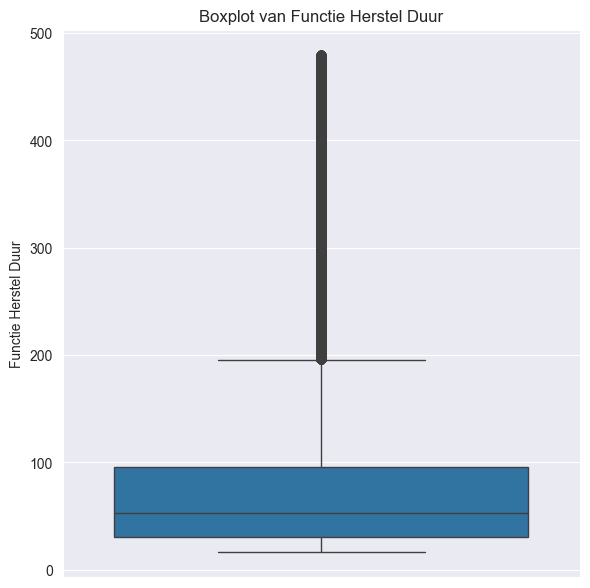

Q1 (25e percentiel): 30.0
Mediaan (50e percentiel): 53.0
Q3 (75e percentiel): 96.0


In [94]:
plt.figure(figsize=(6, 6))
sns.boxplot(y='targetherstel', data=data)
plt.ylabel('Functie Herstel Duur')
plt.title('Boxplot van Functie Herstel Duur')
plt.tight_layout()
plt.show()

q1 = data['targetherstel'].quantile(0.25)
mediaan = data['targetherstel'].median()
q3 = data['targetherstel'].quantile(0.75)

print(f"Q1 (25e percentiel): {q1}")
print(f"Mediaan (50e percentiel): {mediaan}")
print(f"Q3 (75e percentiel): {q3}")

we zien dat na de filtering, 25% van de meldingen een hersteltijd heeft van 15 tot 30 minuten.<br>
Mediaan ligt op 53 minuten en 75% liggen onder 96 minuten(ander halfuur) <br>
De uitschiters zijn ook continue verdeelt, er zijn geen grote gaten tussen de verdeling.

# datum reparatie

In [95]:
#Zet de kolom om naar datetime,vervang de datum door de dag van het jaar
data['day_of_year'] = pd.to_datetime(data['stm_sap_melddatum'], format='%d/%m/%Y').dt.dayofyear

# prioriteit

stm_prioriteit dat 8 heeft geen functionalitieit verlies of Melding met buiten termijn aanvraag, en stm_prioriteit 9 komen de melding niet naar de meldkamer beschiktbaar.

In [96]:
data=data.loc[(data['stm_prioriteit']!=8)&(data['stm_prioriteit']!=9)]

In [97]:
data

,stm_oorz_code,stm_sap_melddatum,stm_sap_meldtijd,stm_aanntpl_tijd,stm_fh_tijd,stm_techn_mld,stm_prioriteit,stm_contractgeb_mld,stm_fh_duur,stm_progfh_in_duur,stm_progfh_in_tijd,targetherstel,day_of_year
98626,215.0,19/07/2016,545.0,30.0,240.0,NaN,2.0,NaN,1012.0,270,300.0,210.0,201
144452,215.0,06/10/2014,749.0,788.0,810.0,S,4.0,26.0,53.0,31,819.0,22.0,279
144457,215.0,06/10/2014,1012.0,583.0,632.0,S,4.0,25.0,1051.0,41,624.0,49.0,279
144458,225.0,06/10/2014,1145.0,1185.0,1214.0,S,2.0,5.0,61.0,35,1220.0,29.0,279
144459,143.0,06/10/2014,1255.0,18.0,53.0,NaN,5.0,NaN,226.0,90,108.0,35.0,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
908610,203.0,11/05/2013,164.0,171.0,314.0,NaN,5.0,NaN,150.0,159,330.0,143.0,131
908624,215.0,11/05/2013,486.0,545.0,569.0,NaN,5.0,NaN,83.0,30,575.0,24.0,131
908626,218.0,11/05/2013,561.0,608.0,644.0,S,2.0,4.0,83.0,52,660.0,36.0,131
908628,135.0,20/08/2016,855.0,885.0,914.0,NaN,2.0,NaN,19.0,75,960.0,29.0,233


# Retypen

technische melding heeft type object, om voor model makelijker te maken zeten we het naar encoding

In [98]:
le = LabelEncoder()

data['stm_techn_mld_encoded'] = le.fit_transform(data['stm_techn_mld'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [99]:
print(label_mapping)

{'A': np.int64(0), 'B': np.int64(1), 'E': np.int64(2), 'G': np.int64(3), 'I': np.int64(4), 'K': np.int64(5), 'M': np.int64(6), 'O': np.int64(7), 'P': np.int64(8), 'S': np.int64(9), 'T': np.int64(10), 'X': np.int64(11), nan: np.int64(12)}


Veder zijn nog velen kolomen dat object type zijn, wat intergers kun om gezet worden.

In [100]:
data = data.fillna(0) # vervang nan's in kolomen naar 0

/tmp/ipykernel_10620/926493723.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna(0) # vervang nan's in kolomen naar 0


In [101]:
# Tezet alle numerike kolomen als type intergers
int_columns = ['stm_oorz_code','day_of_year','stm_sap_meldtijd','stm_aanntpl_tijd','stm_fh_tijd','stm_progfh_in_duur',
    'stm_progfh_in_tijd','targetherstel','stm_contractgeb_mld','stm_prioriteit','stm_fh_duur','stm_techn_mld_encoded']

for col in int_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce').astype('Int64')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168699 entries, 98626 to 908629
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   stm_oorz_code          168699 non-null  Int64 
 1   stm_sap_melddatum      168699 non-null  object
 2   stm_sap_meldtijd       168699 non-null  Int64 
 3   stm_aanntpl_tijd       168699 non-null  Int64 
 4   stm_fh_tijd            168699 non-null  Int64 
 5   stm_techn_mld          168699 non-null  object
 6   stm_prioriteit         168699 non-null  Int64 
 7   stm_contractgeb_mld    168699 non-null  Int64 
 8   stm_fh_duur            168699 non-null  Int64 
 9   stm_progfh_in_duur     168699 non-null  Int64 
 10  stm_progfh_in_tijd     168699 non-null  Int64 
 11  targetherstel          168699 non-null  Int64 
 12  day_of_year            168699 non-null  Int64 
 13  stm_techn_mld_encoded  168699 non-null  Int64 
dtypes: Int64(12), object(2)
memory usage: 25.3+ MB


## save data

In [103]:
data.to_csv('Data/sap_storing_data_hu_filtered.csv', index=False)

In [104]:
{col: data[col].unique() for col in ['stm_prioriteit','stm_oorz_code', 'stm_contractgeb_mld']}

{'stm_prioriteit': <IntegerArray>
 [2, 4, 5, 1]
 Length: 4, dtype: Int64,
 'stm_oorz_code': <IntegerArray>
 [215, 225, 143, 221, 218, 133, 145, 226, 235, 219, 147, 214, 240, 203, 213,
  132, 228, 184, 140, 222, 149, 154, 230, 299, 212, 207, 201, 223, 151, 135,
  209, 298, 146, 241, 227, 210, 208, 183, 185, 186,   0, 148, 211, 220, 144,
  204, 181, 182, 150, 187, 142, 224, 294, 234, 229, 188, 242, 134, 231, 250,
  131, 206, 141, 136, 189, 239, 205, 130, 202, 999, 233,  33, 180]
 Length: 73, dtype: Int64,
 'stm_contractgeb_mld': <IntegerArray>
 [ 0, 26, 25,  5,  2, 24, 18, 20, 27,  1, 19,  8, 30, 34, 10, 11, 32, 23,  6,
   9,  3, 29, 36,  4, 31, 21, 12, 35, 16,  7, 81, 33, 14, 37, 13, 22, 28, 15,
  71, 56, 99, 62, 60, 64, 17, 61, 58, 52, 53, 59, 63, 51, 54, 55, 83, 70]
 Length: 56, dtype: Int64}

## Modellen

### Baseline

We neem RMSE van prognose tijd duur met de traget als de baseline voor het model.

In [105]:
np.sqrt(mean_squared_error(data['stm_progfh_in_duur'], data['targetherstel']))

np.float64(192.81204258797183)

Naast de RMSE waarde, wanneer kan we zeggen of een verspelling ook een goede verspelling is?<br> Als de verspelling target herstel tijd kan bedekken met een maximale verschil van 15 minuten.

In [106]:
tolerance = 15

# Bepaal welke voorspellingen als 'correct' worden beschouwd:
# - De prognose duur ('stm_progfh_in_duur') is groter dan de werkelijke duur ('targetherstel')
# - Het verschil tussen prognose duur en werkelijke duur is maximaal 15 minuten
correct = (data['stm_progfh_in_duur'] > data['targetherstel']) & \
          (abs(data['stm_progfh_in_duur'] - data['targetherstel']) <= tolerance)

# Bereken het gemiddelde aantal correcte voorspellingen (i.e. de nauwkeurigheid)
accuracy = np.mean(correct)

print(f"Accuracy (overschatting binnen {tolerance} minuten): {accuracy:.2%}")

Accuracy (overschatting binnen 15 minuten): 35.10%


In [107]:
len(data[data['stm_progfh_in_duur'] > data['targetherstel']])/len(data)

0.813869673204939

Uit data blijk 35.24% van data van de prognose zal goede verspelling zijn, waarbij 82% van alle data altijd de targetherstel tijd kunt bedekken is.<br>
Het is belangrijk dat de voorspelling beter overschat dan onderschat in de project.

Veder is te zien, als model altijd 30 minuten voorspeelt, heeft het model een accuracy van 39% heeft.

In [108]:
# Totale aantal rijen in de DataFrame
total = len(data)

# Tel het aantal rijen waar 'targetherstel' binnen het opgegeven bereik valt en waarbij 'stm_progfh_in_duur' groter dan 'stm_progfh_in_duur' zijn.
count = len(data[(data['targetherstel'] >= 15) & (data['targetherstel'] <= 45) & (data['stm_progfh_in_duur'] >= data['targetherstel']) ])

print(f'score {label}: {count/total:.2%}')

score 8h+: 39.31%


Dus wanner is het model beter dan nu?<br>
1.Als RMSE kleiner wordt<br>
2.Als verspelling met marge van 15 minuten het Target kunt bedekken en een hogere scoren boven 39% accuracy heeft<br>
3.Als de totale verspelling een betere dekkingsgraad heeft.

### Linear Regression

In [109]:
def Train_per_categorical(data):
    data = data.copy()  # Voorkom SettingWithCopyWarning

    # Categorische kolommen die één voor één toegevoegd worden
    categorical_cols = ['stm_oorz_code', 'stm_contractgeb_mld', 'stm_techn_mld', 'stm_prioriteit']

    # Numerieke kolommen die altijd in het model zitten
    fixed_numeric_cols = ['stm_sap_meldtijd','day_of_year','stm_aanntpl_tijd', 'stm_progfh_in_duur']

    # Eerst de baseline (alleen vaste numerieke features)
    print("Baseline model: alleen numerieke features")
    X_base = data[fixed_numeric_cols]
    y = data['targetherstel']

    X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"[Baseline] R² = {r2:.3f}, RMSE = {rmse:.2f}")

    # Accuracy en coverage
    tolerance = 15
    correct = (data['stm_progfh_in_duur'] > data['targetherstel']) & \
              ((data['stm_progfh_in_duur'] - data['targetherstel']) <= tolerance)
    accuracy = np.mean(correct)
    coverage = np.mean(data['stm_progfh_in_duur'] > data['targetherstel'])
    print(f"[Baseline] Accuracy (±{tolerance} min overschatting): {accuracy:.2%}")
    print(f"[Baseline] coverage: {coverage:.2%}")

    # Vervolgens per categorische kolom apart toevoegen
    for col in categorical_cols:
        print(f"\nModel trainen met categorische kolom: '{col}' + vaste numerieke features")

        data[col] = data[col].astype(str)
        X_cat = pd.get_dummies(data[[col]], drop_first=True)

        X = pd.concat([data[fixed_numeric_cols], X_cat], axis=1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        print(f"R² = {r2:.3f}, RMSE = {rmse:.2f}")

        # Accuracy & coverage opnieuw berekenen (zelfde formule)
        correct = (y_pred > y_test) & \
                  (abs(y_pred - y_test) <= 15)
        accuracy = np.mean(correct)
        coverage = np.mean(data['stm_progfh_in_duur'] > data['targetherstel'])

        print(f"Accuracy (±{tolerance} min overschatting): {accuracy:.2%}")
        print(f"coverage: {coverage:.2%}")



In [110]:
Train_per_categorical(data)

Baseline model: alleen numerieke features
[Baseline] R² = 0.117, RMSE = 69.40
[Baseline] Accuracy (±15 min overschatting): 35.10%
[Baseline] coverage: 81.39%

Model trainen met categorische kolom: 'stm_oorz_code' + vaste numerieke features
R² = 0.155, RMSE = 67.87
Accuracy (±15 min overschatting): 13.83%
coverage: 81.39%

Model trainen met categorische kolom: 'stm_contractgeb_mld' + vaste numerieke features
R² = 0.123, RMSE = 69.15
Accuracy (±15 min overschatting): 11.54%
coverage: 81.39%

Model trainen met categorische kolom: 'stm_techn_mld' + vaste numerieke features
R² = 0.125, RMSE = 69.10
Accuracy (±15 min overschatting): 11.80%
coverage: 81.39%

Model trainen met categorische kolom: 'stm_prioriteit' + vaste numerieke features
R² = 0.119, RMSE = 69.31
Accuracy (±15 min overschatting): 11.48%
coverage: 81.39%


## conclusie

Naast de datum, meldings tijd, aannemer anweizig tijd en prognse functie herstel duur, is per categorische kolom gekeken of er bijdraag is voor de model. Maar leidt niet op beter uitkomst komt.<br>
<br>
Vergelijken met de baseline heeft het model een lager RMSE waarde. Maar de rest is ongeveer zelfde gebleven. Verder is het accuracy ook niet hooger dan 42.15%, dus het model presteert niet echt beter dan nu

## save model

In [111]:
X = data[['stm_sap_meldtijd','day_of_year','stm_aanntpl_tijd', 'stm_progfh_in_duur']]
y = data['targetherstel']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [114]:
joblib.dump(model, 'Models/LinearRegressionModel.joblib')

['Models/LinearRegressionModel.joblib']

## Decision Tree

### continue naar klassen 

#### targetherstel

Voor de decision tree is gekozen voor het trainen van model om de target in verschillen de classen te verdelen <br>
gatllen tusen 15 tot 30 min wordt klase 1<br>
30 to 45 min wordt klase 2<br>
....

In [115]:
def build_klassen(start=15, end=481, step=15):
    klassen = {}
    index = 1
    for lower in range(start, end, step):
        upper = lower + step
        klassen[index] = (lower, upper)
        index += 1
    return klassen

klassen = build_klassen()

In [116]:
def categorize_herstel(minuten):
    for label, (min_val, max_val) in klassen.items():
        if min_val <= minuten < max_val:
            return label
    return 0
data['herstel_klasse'] = data['targetherstel'].apply(categorize_herstel)
data['herstel_klasse'] = data['targetherstel'].apply(categorize_herstel)

In [117]:
data['herstel_klasse']

98626     14
144452     1
144457     3
144458     1
144459     2
          ..
908610     9
908624     1
908626     2
908628     1
908629     1
Name: herstel_klasse, Length: 168699, dtype: int64

#### tijden

verdeel de tijden per 15 minuten in klassen.

In [118]:
bin_size = 15
data['aanntpl_tijd_bin'] = (data['stm_aanntpl_tijd'] // bin_size) * bin_size
data['meldtijd_bin'] = (data['stm_sap_meldtijd'] // bin_size) * bin_size

verdeel de prognose duur per 15 minuten in klassen.

In [119]:
data['progfh_in_duur_bin'] = (data['stm_progfh_in_duur'] // bin_size) * bin_size

### model

In [120]:
def train_decision_tree(data):
    """Train verbeterd Decision Tree model met hyperparameter tuning"""
    data = data.copy()

    # Alle feature categorieën
    numeric_cols = ['day_of_year', 'meldtijd_bin','aanntpl_tijd_bin', 'progfh_in_duur_bin', 'stm_prioriteit','stm_oorz_code', 'stm_contractgeb_mld','stm_techn_mld_encoded']

    # Feature engineering: voeg afgeleide features toe
    data['tijd_verschil_meld_aanntpl'] = data['stm_aanntpl_tijd'] - data['stm_sap_meldtijd']

    # Voeg tijdsgerelateerde features toe
    data['uur_van_dag'] = (data['stm_sap_meldtijd'] // 60).astype(int)
    data['is_spitsuur'] = ((data['uur_van_dag'] >= 7) & (data['uur_van_dag'] <= 9) |
                          (data['uur_van_dag'] >= 17) & (data['uur_van_dag'] <= 19)).astype(int)

    # Update numeric columns met nieuwe features
    numeric_cols.extend(['tijd_verschil_meld_aanntpl', 'is_spitsuur'])

    # Prepare features
    X_numeric = data[numeric_cols]

    # Combineer alle features
    X = pd.concat([X_numeric], axis=1)
    y = data[['targetherstel', 'herstel_klasse']]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    y_train = y_train['herstel_klasse']
    y_test = y_test['targetherstel']
    

    # Verbeterd Decision Tree model met betere hyperparameters
    model = DecisionTreeRegressor(
        random_state=42,
        max_depth=20,           # Dieper voor meer complexiteit
        min_samples_split=20,   # Hoger voor regularisatie
        min_samples_leaf=10,    # Hoger voor regularisatie
        max_features=0.7,       # Meer features beschikbaar
        min_impurity_decrease=0.001,  # Verminder overfitting
        ccp_alpha=0.01          # Cost complexity pruning
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # predict keer 15 om weer in minuten te krijgen
    y_pred_minutes = y_pred * 15

    # Evaluatie
    r2 = r2_score(y_pred_minutes,y_test)
    rmse = np.sqrt(mean_squared_error(y_pred_minutes,y_test))

    print("Verbeterd Decision Tree model:")
    print(f"R² = {r2:.3f}, RMSE = {rmse:.2f}")
    print(f"Aantal features: {X.shape[1]}")

    tolerance =15
    correct = (y_pred_minutes +14 >= y_test) & ( (abs(y_test - y_pred_minutes+7 )<=15) )
    accuracy = np.mean(correct)
    coverage = np.mean(y_pred_minutes+14 >= y_test)
    print(f"Tolerance ±{tolerance} min - Accuracy: {accuracy:.2%}, Coverage: {coverage:.2%}")

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nTop 10 belangrijkste features:")
    print(feature_importance.head(10))

    return model, X.columns.tolist(), y_test, y_pred


In [121]:
model, feature_names, test, predict = train_decision_tree(data)

Verbeterd Decision Tree model:
R² = -0.585, RMSE = 58.59
Aantal features: 10
Tolerance ±15 min - Accuracy: 40.74%, Coverage: 70.80%

Top 10 belangrijkste features:
                      feature  importance
3          progfh_in_duur_bin    0.845671
4              stm_prioriteit    0.050066
8  tijd_verschil_meld_aanntpl    0.048934
2            aanntpl_tijd_bin    0.022964
7       stm_techn_mld_encoded    0.014007
5               stm_oorz_code    0.009838
1                meldtijd_bin    0.007150
6         stm_contractgeb_mld    0.001372
0                 day_of_year    0.000000
9                 is_spitsuur    0.000000


Het decision tree model blijkt een lagere RMSE en Hogere Accuracy te hebben.<br>
Maar het accuracy is boven de baseline, maar hier verspelt het model een een tijdstuk en niet en tijdmoment, waardoor het accracy hoger heeft getroken dan normaal.<br>
Ook is hiervoor gekozen om De gros
Veder is tezien dat Coverage 10% lager is dan baselien, wat super slecht is.

## Random Forest

In [122]:
def train_random_forest(data):
    """Train verbeterd Decision Tree model met hyperparameter tuning"""
    data = data.copy()

    # Alle feature categorieën
    numeric_cols = ['day_of_year', 'meldtijd_bin','aanntpl_tijd_bin', 'progfh_in_duur_bin', 'stm_prioriteit','stm_oorz_code', 'stm_contractgeb_mld','stm_techn_mld_encoded']

    # Feature engineering: voeg afgeleide features toe
    data['tijd_verschil_meld_aanntpl'] = data['stm_aanntpl_tijd'] - data['stm_sap_meldtijd']

    # Voeg tijdsgerelateerde features toe
    data['uur_van_dag'] = (data['stm_sap_meldtijd'] // 60).astype(int)
    data['is_spitsuur'] = ((data['uur_van_dag'] >= 7) & (data['uur_van_dag'] <= 9) |
                          (data['uur_van_dag'] >= 17) & (data['uur_van_dag'] <= 19)).astype(int)

    # Update numeric columns met nieuwe features
    numeric_cols.extend(['tijd_verschil_meld_aanntpl', 'is_spitsuur'])
    # Prepare features
    X_numeric = data[numeric_cols]

    # Combineer alle features
    X = pd.concat([X_numeric], axis=1)
    y = data[['targetherstel', 'herstel_klasse']]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    y_train = y_train['herstel_klasse']
    y_test = y_test['targetherstel']

    # Verbeterd Random Forest model
    model = RandomForestRegressor(
        n_estimators=500,       # Meer bomen voor betere prestaties
        random_state=42,
        max_depth=25,           # Dieper voor meer complexiteit
        min_samples_split=10,   # Lager voor meer flexibiliteit
        min_samples_leaf=5,     # Lager voor meer flexibiliteit
        max_features=0.6,       # Optimale feature subset
        bootstrap=True,
        n_jobs=-1,
        oob_score=True,         # Out-of-bag score voor extra evaluatie
        max_samples=0.8,        # Sample subsets voor diversiteit
        min_impurity_decrease=0.0005  # Lichte regularisatie
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_minutes = y_pred * 15

    # Evaluatie
    r2 = r2_score(y_pred_minutes,y_test)
    rmse = np.sqrt(mean_squared_error(y_pred_minutes,y_test))

    print("Verbeterd Random Forest model:")
    print(f"R² = {r2:.3f}, RMSE = {rmse:.2f}")
    print(f"Aantal features: {X.shape[1]}")

    tolerance =15
    correct = (y_pred_minutes +14 > y_test) & (abs(y_test - y_pred_minutes+7)<=15)
    accuracy = np.mean(correct)
    coverage = np.mean(y_pred_minutes+14 >= y_test)
    print(f"Tolerance ±{tolerance} min - Accuracy: {accuracy:.2%}, Coverage: {coverage:.2%}")

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nTop 10 belangrijkste features:")
    print(feature_importance.head(10))

    return model, X.columns.tolist(), y_test, y_pred


In [123]:
rf_model, feature_names, test, predict = train_random_forest(data)

Verbeterd Random Forest model:
R² = -0.317, RMSE = 55.03
Aantal features: 10
Tolerance ±15 min - Accuracy: 42.31%, Coverage: 71.14%

Top 10 belangrijkste features:
                      feature  importance
3          progfh_in_duur_bin    0.572034
8  tijd_verschil_meld_aanntpl    0.096821
2            aanntpl_tijd_bin    0.066708
0                 day_of_year    0.058459
5               stm_oorz_code    0.050723
1                meldtijd_bin    0.048522
6         stm_contractgeb_mld    0.046792
4              stm_prioriteit    0.027895
7       stm_techn_mld_encoded    0.027660
9                 is_spitsuur    0.004387


Het random forest model presenteerd beter dan disision tree, het geburuikte features zijn ook meer varianten, maar de Coverage is nog steeds lager dan de baseline.

In [124]:
joblib.dump(rf_model, 'Models/RandomForest.joblib')

['Models/RandomForest.joblib']

# sortelijk data

In [125]:
def minutes_to_time_str(m):
    hour = m // 60
    minute = m % 60
    return f"{hour:02d}:{minute:02d}"

def found_data(stm_oorz_code,stm_contractgeb_mld,stm_techn_mld,stm_prioriteit):
    data = pd.read_csv('Data/sap_storing_data_hu_filtered.csv')
    if stm_oorz_code:
        data = data[data['stm_oorz_code']==stm_oorz_code]
    if stm_contractgeb_mld:
        data = data[data['stm_contractgeb_mld']==stm_contractgeb_mld]
    if stm_techn_mld:
        data = data[data['stm_techn_mld']==stm_techn_mld]
    if stm_prioriteit:
        data = data[data['stm_prioriteit']==stm_prioriteit]

    data = data[['stm_sap_melddatum','stm_sap_meldtijd','stm_aanntpl_tijd','stm_progfh_in_tijd','stm_progfh_in_duur',
          'stm_prioriteit','stm_oorz_code','stm_contractgeb_mld','stm_techn_mld','stm_fh_tijd',
         'targetherstel']]
    
    data['stm_sap_meldtijd'] = data['stm_sap_meldtijd'].apply(minutes_to_time_str)
    data['stm_aanntpl_tijd'] = data['stm_aanntpl_tijd'].apply(minutes_to_time_str)

    return data.head(10)

In [126]:
found_data(stm_oorz_code=215, stm_contractgeb_mld=26, stm_techn_mld='S', stm_prioriteit=2)

,stm_sap_melddatum,stm_sap_meldtijd,stm_aanntpl_tijd,stm_progfh_in_tijd,stm_progfh_in_duur,stm_prioriteit,stm_oorz_code,stm_contractgeb_mld,stm_techn_mld,stm_fh_tijd,targetherstel
64,23/10/2014,11:57,12:39,849,90,2,215,26,S,918,159
132,17/11/2014,15:44,16:43,1123,120,2,215,26,S,1165,162
198,13/12/2014,17:15,18:23,1133,30,2,215,26,S,1148,45
311,25/01/2015,21:09,21:54,1434,120,2,215,26,S,1435,121
322,02/02/2015,06:49,08:07,577,90,2,215,26,S,539,52
324,03/02/2015,00:55,01:20,140,60,2,215,26,S,106,26
328,04/02/2015,08:49,09:20,620,60,2,215,26,S,592,32
353,14/02/2015,19:37,20:38,1328,90,2,215,26,S,1281,43
407,04/03/2015,17:41,18:26,1136,30,2,215,26,S,1127,21
422,12/03/2015,03:42,04:59,344,45,2,215,26,S,459,160
